In [23]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing




In [3]:
#Import Dataset
fraud=pd.read_csv('Fraud_check.csv')
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [5]:
#EDA
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [7]:
fraud.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [9]:
fraud.corr()

,Taxable.Income,City.Population,Work.Experience
Taxable.Income,1.000000,-0.064387,-0.001818
City.Population,-0.064387,1.000000,0.013135
Work.Experience,-0.001818,0.013135,1.000000


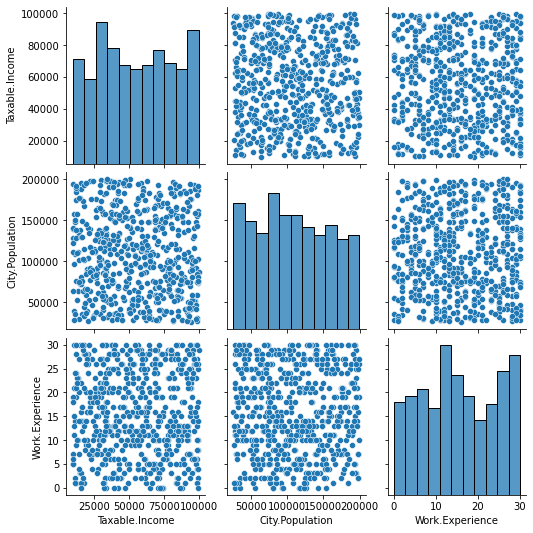

In [11]:
#Data Visualisation
import seaborn as sns
sns.pairplot(fraud)

In [25]:
#Preprocessing the data
fraud.loc[fraud["Taxable.Income"]<=30000,"Fraudcheck"]="Risky"
fraud.loc[fraud["Taxable.Income"]>30001,"Fraudcheck"]="Good"
fraud


,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Fraudcheck
0,0,2,68833,50047,10,1,Good
1,1,0,33700,134075,18,1,Good
2,0,1,36925,160205,30,1,Good
3,1,2,50190,193264,15,1,Good
4,0,1,81002,27533,28,0,Good
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,Good
596,1,0,69967,55369,2,1,Good
597,0,0,47334,154058,0,1,Good
598,1,1,98592,180083,17,0,Good


In [26]:
#Complete Dataset
label_encoder=preprocessing.LabelEncoder()
fraud["Undergrad"]=label_encoder.fit_transform(fraud["Undergrad"])
fraud["Marital.Status"]=label_encoder.fit_transform(fraud["Marital.Status"])
fraud["Urban"]=label_encoder.fit_transform(fraud["Urban"])
fraud["Fraudcheck"]=label_encoder.fit_transform(fraud["Fraudcheck"])
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Fraudcheck
0,0,2,68833,50047,10,1,0
1,1,0,33700,134075,18,1,0
2,0,1,36925,160205,30,1,0
3,1,2,50190,193264,15,1,0
4,0,1,81002,27533,28,0,0
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,0
596,1,0,69967,55369,2,1,0
597,0,0,47334,154058,0,1,0
598,1,1,98592,180083,17,0,0


In [29]:
x=fraud.iloc[:,0:5]
y=fraud['Fraudcheck']

In [31]:
x

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience
0,0,2,68833,50047,10
1,1,0,33700,134075,18
2,0,1,36925,160205,30
3,1,2,50190,193264,15
4,0,1,81002,27533,28
...,...,...,...,...,...
595,1,0,76340,39492,7
596,1,0,69967,55369,2
597,0,0,47334,154058,0
598,1,1,98592,180083,17


In [33]:
y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: Fraudcheck, Length: 600, dtype: int32

In [35]:
fraud['Fraudcheck'].unique()

array([0, 1])

In [37]:
fraud.Fraudcheck.value_counts()

0    476
1    124
Name: Fraudcheck, dtype: int64

In [38]:
colnames=list(fraud.columns)
colnames

['Undergrad',
 'Marital.Status',
 'Taxable.Income',
 'City.Population',
 'Work.Experience',
 'Urban',
 'Fraudcheck']

In [40]:
#Splitting data into training and testing datasets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)

In [45]:
#Building decision tree classifier using ENTROPY criteria
model=DecisionTreeClassifier(criterion='entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

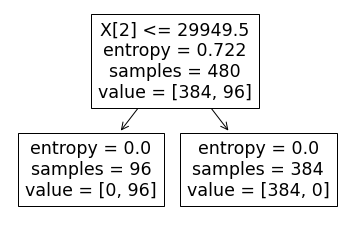

In [46]:
#Plot the decision tree
tree.plot_tree(model);

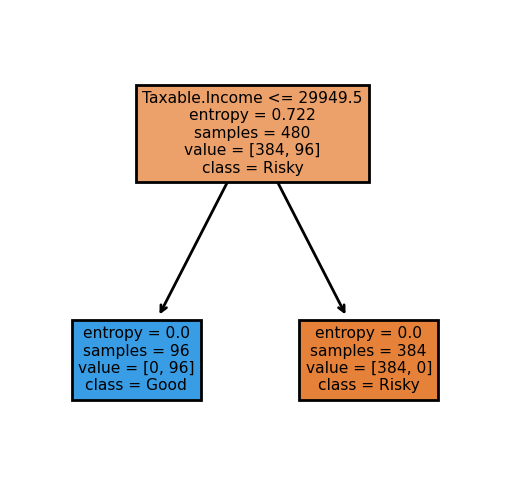

In [51]:
fn=['Undergrad','Marital.Status','Taxable.Income','Work.Experience','Urban']
cn=['Risky','Good']
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(3,3),dpi=200)
tree.plot_tree(model,feature_names=fn,class_names=cn,filled=True);


In [53]:
#To know the most important feature/root node
model.feature_importances_

array([0., 0., 1., 0., 0.])

In [57]:
feature_imp=pd.Series(model.feature_importances_,index=fn).sort_values(ascending=False)
feature_imp

Taxable.Income     1.0
Undergrad          0.0
Marital.Status     0.0
Work.Experience    0.0
Urban              0.0
dtype: float64

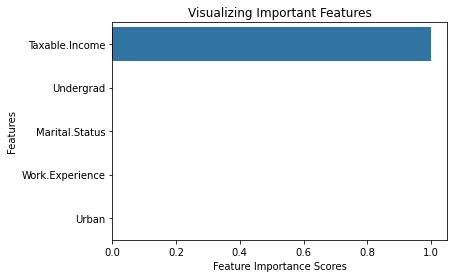

In [59]:
%matplotlib inline
#Creating a barplot for most important features
sns.barplot(x=feature_imp,y=feature_imp.index)
plt.xlabel('Feature Importance Scores')
plt.ylabel('Features')
plt.title('Visualizing Important Features')
plt.show()

In [60]:
#Predicting on Test Data
preds=model.predict(x_test)#Predicting on test data set
pd.Series(preds).value_counts()#getting the count of each category

0    92
1    28
dtype: int64

In [61]:
preds

array([0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [63]:
pd.crosstab(y_test,preds)#getting the 2 way table to understand the correct and wrong predictions

col_0,0,1
Fraudcheck,,
0,92,0
1,0,28


In [65]:
#Accuracy
np.mean(preds==y_test)

1.0

In [67]:
#Building decision tree classifier(CART) using GINI criteria
from sklearn.tree import DecisionTreeClassifier
model_gini=DecisionTreeClassifier(criterion='gini',max_depth=5)

In [69]:
model_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [71]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(preds==y_test)

1.0

In [73]:
model.feature_importances_

array([0., 0., 1., 0., 0.])

In [75]:
#Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [78]:
array=fraud.values
x=array[:,0:4]
y=array[:,-4]

In [80]:
y

array([ 50047, 134075, 160205, 193264,  27533, 116382,  80890, 131253,
       102481, 155482, 102602,  94875, 148033,  86649,  57529, 107764,
        34551,  57194,  59269, 126953, 147222,  29106, 155342,  50495,
        28495, 124606, 169128,  28542, 128766,  41863, 117788, 147414,
        51911, 157251, 183767,  41117, 193995,  66912, 177575,  54981,
       199697,  91524,  51666,  50020,  98880, 183095, 137346,  34964,
        35480, 160195, 145804, 174042,  91828, 139143,  98207,  89965,
        69832,  70744, 158047, 102228,  91138,  86169, 147684,  95831,
       118261, 194738,  66985, 173986, 139642,  86896,  80904, 105680,
       108300, 174789, 182319,  50404, 129164, 118344, 143153, 140885,
        28184, 121608, 111068,  73963, 178083, 125155,  97520,  64075,
        63896, 176050, 101232,  73733, 114621, 137676, 122705, 121498,
        63622,  37849,  77053, 114350,  46444,  50490,  91488,  76318,
       174423,  46893,  58535,  52424, 120894, 178585,  32450, 164526,
      

In [81]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=50_Startups.csv0)

In [82]:
model=DecisionTreeRegressor()
model.fit(x_train,y_train)

DecisionTreeRegressor()

In [83]:
model.score(x_test,y_test)

0.9999046755957253